In [29]:
from openff.toolkit.topology import Molecule
import qcengine
from qcelemental.models import AtomicInput, OptimizationInput
from qcelemental.models.common_models import Model
from qcelemental.models.procedures import QCInputSpecification

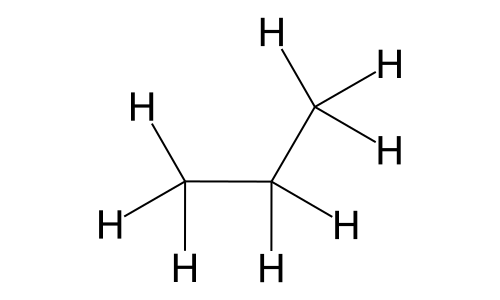

In [30]:
mol = Molecule.from_smiles("CCC")
mol.generate_conformers(n_conformers=1)
mol.visualize("rdkit")

In [31]:
qcel_mol = mol.to_qcschema()
qcel_mol.dict()

{'schema_name': 'qcschema_molecule',
 'schema_version': 2,
 'validated': True,
 'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
 'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
        [ 0.07003991,  1.2543373 , -0.12218767],
        [-2.29068092, -0.35767834, -0.38770454],
        [ 1.59886993, -2.42010654,  0.8535708 ],
        [ 3.58240142, -0.65088498, -1.20898496],
        [ 3.22220326,  0.19860749,  2.16284195],
        [-0.27539602,  2.62148252,  1.4412282 ],
        [ 0.46275112,  2.35562944, -1.85017942],
        [-2.9804508 , -0.4610761 , -2.3463816 ],
        [-1.85570072, -2.35535096,  0.17702883],
        [-3.83252518,  0.27414605,  0.88053992]]),
 'name': 'C3H8',
 'molecular_charge': 0.0,
 'molecular_multiplicity': 1,
 'connectivity': [(0, 1, 1.0),
  (0, 3, 1.0),
  (0, 4, 1.0),
  (0, 5, 1.0),
  (1, 2, 1.0),
  (1, 6, 1.0),
  (1, 7, 1.0),
  (2, 8, 1.0),
  (2, 9, 1.0),
  (2, 10, 1.0)],
 'fix_com': False,
 'fix_orientation':

In [35]:
# mace_model = Model(method="MACE_SPICE_larger.model", basis=None)
mace_model = Model(method="./MACE_model_run-123.model", basis=None)
ani_model = Model(method="ani2x", basis=None)

In [36]:
qc_task = AtomicInput(molecule=qcel_mol, driver="energy", model=mace_model)
qc_task

AtomicInput(driver='energy', model={'method': './MACE_model_run-123.model', 'basis': None}, molecule_hash='26538b8')

In [37]:
# compute the energy
result = qcengine.compute(input_data=qc_task, program="mace")

In [38]:
result.dict()

{'id': None,
 'input_data': {'id': None,
  'schema_name': 'qcschema_input',
  'schema_version': 1,
  'molecule': {'schema_name': 'qcschema_molecule',
   'schema_version': 2,
   'validated': True,
   'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
   'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
          [ 0.07003991,  1.2543373 , -0.12218767],
          [-2.29068092, -0.35767834, -0.38770454],
          [ 1.59886993, -2.42010654,  0.8535708 ],
          [ 3.58240142, -0.65088498, -1.20898496],
          [ 3.22220326,  0.19860749,  2.16284195],
          [-0.27539602,  2.62148252,  1.4412282 ],
          [ 0.46275112,  2.35562944, -1.85017942],
          [-2.9804508 , -0.4610761 , -2.3463816 ],
          [-1.85570072, -2.35535096,  0.17702883],
          [-3.83252518,  0.27414605,  0.88053992]]),
   'name': 'C3H8',
   'molecular_charge': 0.0,
   'molecular_multiplicity': 1,
   'connectivity': [(0, 1, 1.0),
    (0, 3, 1.0),
    (0, 4

In [39]:
ani_task = AtomicInput(molecule=qcel_mol, driver="energy", model=ani_model)

In [40]:
ani_result = qcengine.compute(input_data=ani_task, program="torchani")

/home/tommy/.pyenv/versions/miniconda3-latest/envs/openmm-8-beta-linux/lib/python3.10/site-packages/torchani/aev.py:249: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  pair_sizes = counts * (counts - 1) // 2


In [41]:
ani_result.dict()

{'id': None,
 'schema_name': 'qcschema_output',
 'schema_version': 1,
 'molecule': {'schema_name': 'qcschema_molecule',
  'schema_version': 2,
  'validated': True,
  'symbols': array(['C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], dtype='<U1'),
  'geometry': array([[ 2.29848801, -0.45910588,  0.4002285 ],
         [ 0.07003991,  1.2543373 , -0.12218767],
         [-2.29068092, -0.35767834, -0.38770454],
         [ 1.59886993, -2.42010654,  0.8535708 ],
         [ 3.58240142, -0.65088498, -1.20898496],
         [ 3.22220326,  0.19860749,  2.16284195],
         [-0.27539602,  2.62148252,  1.4412282 ],
         [ 0.46275112,  2.35562944, -1.85017942],
         [-2.9804508 , -0.4610761 , -2.3463816 ],
         [-1.85570072, -2.35535096,  0.17702883],
         [-3.83252518,  0.27414605,  0.88053992]]),
  'name': 'C3H8',
  'molecular_charge': 0.0,
  'molecular_multiplicity': 1,
  'connectivity': [(0, 1, 1.0),
   (0, 3, 1.0),
   (0, 4, 1.0),
   (0, 5, 1.0),
   (1, 2, 1.0),
   (1, 6, 

In [42]:
geometric_input = OptimizationInput(initial_molecule=qcel_mol, input_specification=QCInputSpecification(model=mace_model), keywords={"coordsys": "dlc", "maxiter": 300, "program": "mace"})
geometric_input

OptimizationInput(model={'method': './MACE_model_run-123.model', 'basis': None}, molecule_hash='26538b8')

In [43]:
opt_result = qcengine.compute_procedure(input_data=geometric_input, procedure="geometric")

In [45]:
len(opt_result.trajectory)

AttributeError: 'FailedOperation' object has no attribute 'trajectory'

In [15]:
opt_result.trajectory[-1].dict()

AttributeError: 'FailedOperation' object has no attribute 'trajectory'

In [ ]:
from openmm import unit
mol._conformers=[]
for result in opt_result.trajectory:
    mol.add_conformer(result.molecule.geometry * unit.bohr)

In [ ]:
mol.to_file("mol.xyz", "xyz")

In [ ]:
ani_geo_input = OptimizationInput(initial_molecule=qcel_mol, input_specification=QCInputSpecification(model=ani_model), keywords={"coordsys": "dlc", "maxiter": 300, "program": "torchani"})
ani_geo_input



In [ ]:
ani_result = qcengine.compute_procedure(input_data=ani_geo_input, procedure="geometric")

In [ ]:
len(ani_result.trajectory)